<a href="https://colab.research.google.com/github/Ahmedzayan1/Eigen-faces/blob/main/Eigen_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1 
Omar Ahmed ElSammak 6867<br>
Aly Hamdy Ibrahim   6760<br>
Ahmed Mohamed Zayan 6714

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import cv2 as cv
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## 1. Download the Dataset and Understand the Format (10 Points)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/eigenfaces/'

Mounted at /content/drive


#2.Generate the Data Matrix and the Label vector (10 Points)

In [ ]:
def read_single_image(image_path):
    ans = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'
        #print(f.readline())
        #print(f.readline())
        
        for i in range(10304):
            ans.append(ord(f.read(1)))
    return ans 
    
def get_images():
    
    images = []
    persons = []
    number_of_persons=40
    
    print('Reading Started')
    for x in range(1, number_of_persons + 1):
        current_person_path = path + 's' + str(x) + '/'
        for y in range(1, 11):
            persons.append(str(x))
            images.append(read_single_image(current_person_path + str(y) + '.pgm'))
    print('Reading Finished')
    print("number of images",len(images))
    print("length of image ",len(images[0]))
    print("number of faces",len(persons))
    
    images = np.array(images)
    return images, persons
            

(data, labels) = get_images()

#data = pd.DataFrame(data,index=labels)

Reading Started
Reading Finished
number of images 400
length of image  10304
number of faces 400


In [ ]:
data

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]])

#3.Split the Dataset into Training and Test sets (10 Points)

In [ ]:
def custom_train_test_split(data, labels, samples_no):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for i in range(samples_no):
        if i%2 != 0:
            X_train.append(data[i])
            y_train.append(labels[i])
        else:
            X_test.append(data[i])
            y_test.append(labels[i])
    return X_train, y_train, X_test, y_test


In [ ]:
X_train, y_train, X_test, y_test = custom_train_test_split(data, labels, len(data))
train_data = pd.DataFrame(X_train,index=y_train)

In [ ]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
1,60,60,62,53,48,51,61,60,71,68,...,27,35,28,33,31,31,37,32,34,34
1,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
1,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
1,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
1,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
2,37,35,35,37,36,37,35,36,37,37,...,26,28,26,28,24,26,27,26,28,28
2,34,36,35,36,33,36,36,38,36,38,...,25,25,24,27,25,27,22,32,25,25
2,34,35,35,40,36,39,38,34,37,39,...,26,27,23,29,26,27,26,31,24,24
2,34,39,35,38,34,41,37,36,35,39,...,139,143,144,134,139,142,128,135,138,148
2,37,34,38,36,38,34,38,36,38,37,...,172,152,137,144,135,140,146,135,143,133


#4.Classification using PCA (30 points) & 6.Classifier Tuning (20 Points)

In [ ]:
def dimensionality(alpha, eig_values):
    sum = np.sum(eig_values)
    r = 0
    i = 0
    for value in eig_values: 
        r = r + eig_values[i]
        i = i + 1
        if (r / sum >= alpha):
            break
    return i

def reduced_dimensions(alpha_values, eig_values):
    reduced_dimensions = []
    for alpha in alpha_values:
        reduced_dimensions.append(dimensionality(alpha, eig_values))
    return reduced_dimensions

def PCA(data, alphas,eigen_vectors,eigen_values):
    r = reduced_dimensions(alphas, eigen_values)
    return r, eigen_vectors

  


In [ ]:
centralized_data = X_train - np.mean(X_train,axis=0, keepdims=True)
print("centralized_data shape:", centralized_data.shape)
cov_matrix=np.cov(np.transpose(centralized_data),bias=True)
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
mean = np.mean(train_data)
print(eigen_values)


centralized_data shape: (200, 10304)
[-1.79767800e-09 -1.25750599e-09 -9.71650920e-10 ...  1.06569341e+06
  2.14179597e+06  2.76884465e+06]


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eigen_values

array([-1.79767800e-09, -1.25750599e-09, -9.71650920e-10, ...,
        1.06569341e+06,  2.14179597e+06,  2.76884465e+06])

In [ ]:
eigen_values_sum = np.sum(eigen_values)

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
r,eigen_vectors=PCA(data, alphas,eigen_vectors,eigen_values)

In [ ]:
from sklearn import metrics
def classify(X_train, y_train, X_test, y_test, n_neighbors,cm):
    print( n_neighbors)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    if cm:
      print("Classification report: " )
      print(classification_report(y_test, y_predict))
      confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
      cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
      cm_display.plot()
      plt.show()
    return acc

Acc for train--> 1.0
Acc for test--> 0.94
Acc for train--> 0.925
Acc for test--> 0.845
Acc for train--> 0.86
Acc for test--> 0.805
Acc for train--> 0.78
Acc for test--> 0.75


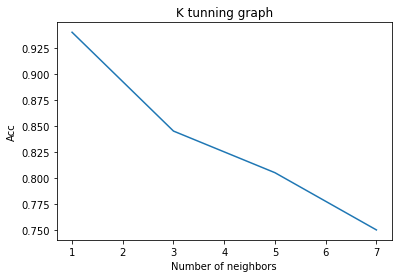

Acc for train--> 1.0
Acc for test--> 0.945
Acc for train--> 0.965
Acc for test--> 0.88
Acc for train--> 0.885
Acc for test--> 0.835
Acc for train--> 0.825
Acc for test--> 0.775


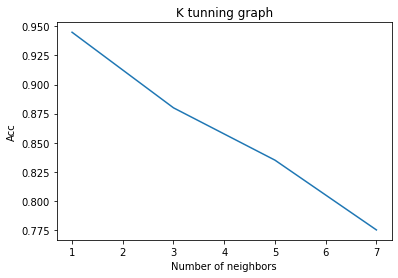

Acc for train--> 1.0
Acc for test--> 0.945
Acc for train--> 0.965
Acc for test--> 0.88
Acc for train--> 0.885
Acc for test--> 0.835
Acc for train--> 0.825
Acc for test--> 0.775


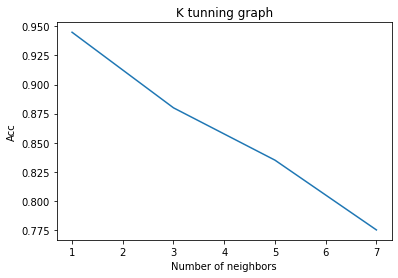

Acc for train--> 1.0
Acc for test--> 0.945
Acc for train--> 0.965
Acc for test--> 0.88
Acc for train--> 0.885
Acc for test--> 0.835
Acc for train--> 0.825
Acc for test--> 0.775


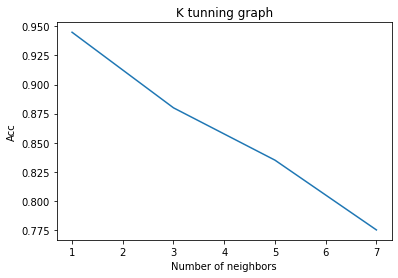

In [ ]:
for i in r:
    U = eigen_vectors[:,0:i].T
    projected_train_data = np.array(np.matmul(centralized_data, U.T))
    projected_test_data = np.array(np.matmul(X_test - np.array(mean), U.T))
    acc = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        acc.append(classify(projected_train_data, y_train, projected_test_data, y_test, k, False))

    plt.plot(k_values, acc)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title('K tunning graph')
    plt.show()

#5.Classification Using LDA (30 Points) & 6.Classifier Tuning (20 Points)

Calculating Mean Vector

In [ ]:
dimensions = 10304
no_of_persons = 40

mean_vector = dict()
for person_no in range(1, no_of_persons + 1):
  person_no = str(person_no)
  person_data = train_data.loc[person_no]
  mean = np.mean(person_data)
  mean_vector[person_no] = mean

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Calculating S and Sb Matrices


In [ ]:
total_mean = np.mean(X_train)
nk = 5

S = np.zeros((dimensions,dimensions))
SB = np.zeros((dimensions,dimensions))

for person_no in range(1, no_of_persons+1):
  person_no = str(person_no)
  person_data = train_data.loc[person_no]
  mean_vector[person_no]
  Z = np.array(person_data - mean_vector[person_no])
  S += Z.T.dot(Z)
  diff = np.array(mean_vector[person_no] - total_mean)
  SB += nk*diff.dot(diff.T)

In [ ]:
S

array([[ 28496.8,  27128.2,  27372.4, ...,  -3977.2,  -3511.6,    539. ],
       [ 27128.2,  28448.8,  27518.6, ...,  -2697.2,  -2349.2,   1781.6],
       [ 27372.4,  27518.6,  28698.4, ...,  -3472.2,   -923.2,   3416.2],
       ...,
       [ -3977.2,  -2697.2,  -3472.2, ..., 140034. ,  83425.8,  64222.2],
       [ -3511.6,  -2349.2,   -923.2, ...,  83425.8,  99585.6,  82754.4],
       [   539. ,   1781.6,   3416.2, ...,  64222.2,  82754.4, 104148.8]])

In [ ]:
train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
1,60,60,62,53,48,51,61,60,71,68,...,27,35,28,33,31,31,37,32,34,34
1,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
1,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
1,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
1,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
2,37,35,35,37,36,37,35,36,37,37,...,26,28,26,28,24,26,27,26,28,28
2,34,36,35,36,33,36,36,38,36,38,...,25,25,24,27,25,27,22,32,25,25
2,34,35,35,40,36,39,38,34,37,39,...,26,27,23,29,26,27,26,31,24,24
2,34,39,35,38,34,41,37,36,35,39,...,139,143,144,134,139,142,128,135,138,148
2,37,34,38,36,38,34,38,36,38,37,...,172,152,137,144,135,140,146,135,143,133


In [ ]:
A = np.linalg.inv(S).dot(SB)
eigen_values, eigen_vectors = np.linalg.eigh(A)
idx = eigen_values.argsort()[::-1]   
eig_values = eigen_values[idx]
eig_vectors = eigen_vectors[:,idx]
U = eig_vectors[:, 0:39].T

Acc for train--> 1.0
Acc for test--> 0.945
Acc for train--> 0.93
Acc for test--> 0.865
Acc for train--> 0.84
Acc for test--> 0.76
Acc for train--> 0.785
Acc for test--> 0.715


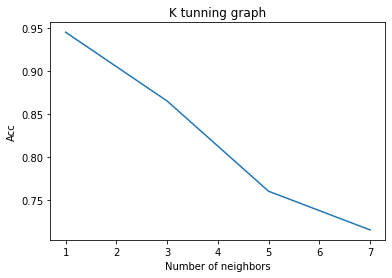

In [ ]:
projected_train_data = np.array(np.matmul(X_train, U.T))
projected_test_data = np.array(np.matmul(X_test, U.T))
acc = []
k_values = [1, 3, 5, 7]
for k in k_values:
    acc.append(classify(projected_train_data, y_train, projected_test_data, y_test, k))

plt.plot(k_values, acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title('K tunning graph')
plt.show()

In [ ]:
    # fig, axes = plt.subplots(10, 4, figsize=(40, 40),subplot_kw={'xticks':[], 'yticks':[] })
    # for i, ax in enumerate(axes.flat):
    #     if i >= 39:
    #         break
    #     ax.imshow(U[i].reshape(112, 92), cmap='gray')
    #     ax.set_title('Face: {}'.format(i+1))
    # plt.show()

#7.Compare vs Non-Face Images (15Points)

In [ ]:
from PIL import Image

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import cv2


images = []
img_no =[]

dir_path = r'/content/drive/MyDrive/resized_images/'
images = []


for filename in os.listdir(dir_path):
   if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.pgm'):
        image = Image.open(os.path.join(dir_path, filename))
        image = image.resize((92, 112))
        image = image.convert('L')
        image_array = np.array(image).flatten()
        images.append(image_array)
 
images = np.array(images)
print(images.shape)

(200, 10304)


In [ ]:
nonfaces_no=200 #change the number of non faces in the dataset
images_ = images[0:nonfaces_no]

In [ ]:
images_.shape

(50, 10304)

In [ ]:
face_labels=['1']*len(data)
non_labels=['0']*len(images_)
data2=np.concatenate((data,images_),axis=0)
all_labels=face_labels + non_labels
X_train2, y_train2, X_test2, y_test2 = custom_train_test_split(data2, all_labels, len(data2))
train_data2 = pd.DataFrame(X_train2,index=y_train2)

In [ ]:
centralized_data2 = X_train2 - np.mean(X_train2,axis=0, keepdims=True)
print("centralized_data shape:", centralized_data2.shape)
cov_matrix2=np.cov(np.transpose(centralized_data2),bias=True)
eigen_values2, eigen_vectors2 = np.linalg.eigh(cov_matrix2)
mean2 = np.mean(train_data2)
print(eigen_values2)


centralized_data shape: (225, 10304)
[-2.80626464e-09 -2.07403316e-09 -1.93918206e-09 ...  1.46611465e+06
  2.70213697e+06  4.58787048e+06]


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)



* non faces pca

In [ ]:
eigen_values_sum2 = np.sum(eigen_values2)
alphas = [0.8, 0.85, 0.9, 0.95]
r2,eigen_vectors2=PCA(data2, alphas,eigen_vectors2,eigen_values2)


1
Acc for train--> 1.0
Acc for test--> 0.9511111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.95      1.00      0.97       200

    accuracy                           0.95       225
   macro avg       0.97      0.78      0.85       225
weighted avg       0.95      0.95      0.94       225



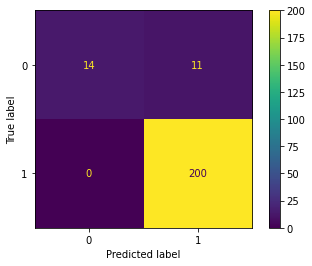

3
Acc for train--> 0.9377777777777778
Acc for test--> 0.9155555555555556
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.91      1.00      0.95       200

    accuracy                           0.92       225
   macro avg       0.96      0.62      0.67       225
weighted avg       0.92      0.92      0.89       225



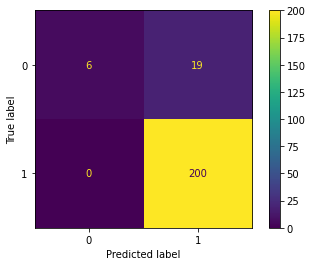

5
Acc for train--> 0.9333333333333333
Acc for test--> 0.9111111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.91      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.60      0.64       225
weighted avg       0.92      0.91      0.88       225



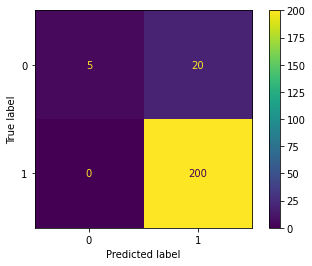

7
Acc for train--> 0.92
Acc for test--> 0.9066666666666666
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        25
           1       0.90      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.58      0.61       225
weighted avg       0.92      0.91      0.88       225



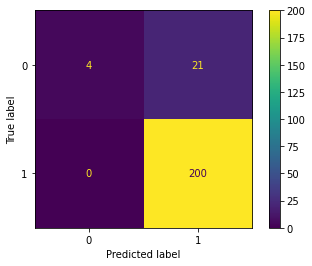

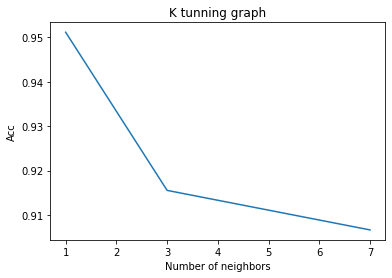

1
Acc for train--> 1.0
Acc for test--> 0.9511111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.95      1.00      0.97       200

    accuracy                           0.95       225
   macro avg       0.97      0.78      0.85       225
weighted avg       0.95      0.95      0.94       225



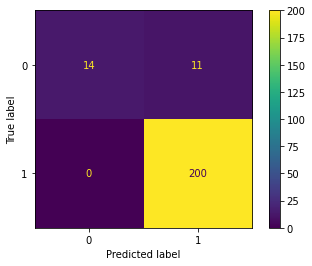

3
Acc for train--> 0.9377777777777778
Acc for test--> 0.9155555555555556
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.91      1.00      0.95       200

    accuracy                           0.92       225
   macro avg       0.96      0.62      0.67       225
weighted avg       0.92      0.92      0.89       225



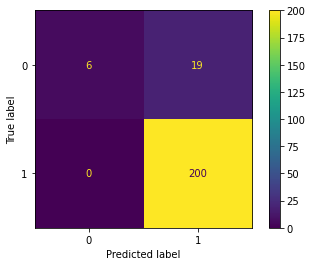

5
Acc for train--> 0.9333333333333333
Acc for test--> 0.9111111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.91      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.60      0.64       225
weighted avg       0.92      0.91      0.88       225



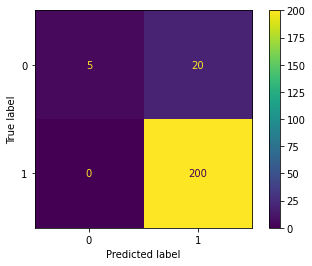

7
Acc for train--> 0.92
Acc for test--> 0.9066666666666666
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        25
           1       0.90      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.58      0.61       225
weighted avg       0.92      0.91      0.88       225



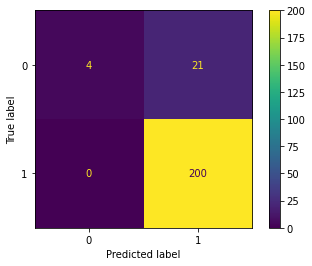

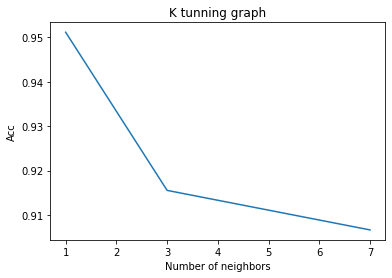

1
Acc for train--> 1.0
Acc for test--> 0.9511111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.95      1.00      0.97       200

    accuracy                           0.95       225
   macro avg       0.97      0.78      0.85       225
weighted avg       0.95      0.95      0.94       225



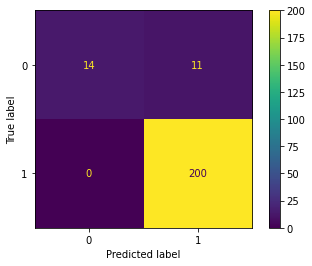

3
Acc for train--> 0.9377777777777778
Acc for test--> 0.9155555555555556
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.91      1.00      0.95       200

    accuracy                           0.92       225
   macro avg       0.96      0.62      0.67       225
weighted avg       0.92      0.92      0.89       225



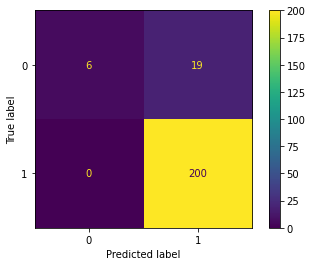

5
Acc for train--> 0.9333333333333333
Acc for test--> 0.9111111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.91      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.60      0.64       225
weighted avg       0.92      0.91      0.88       225



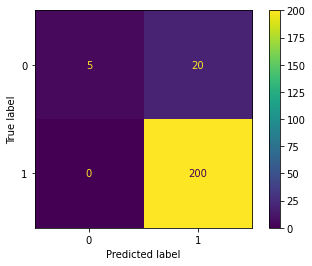

7
Acc for train--> 0.92
Acc for test--> 0.9066666666666666
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        25
           1       0.90      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.58      0.61       225
weighted avg       0.92      0.91      0.88       225



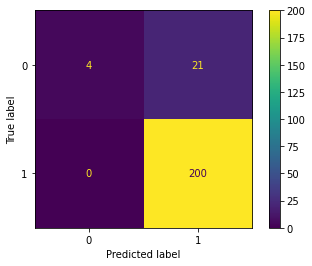

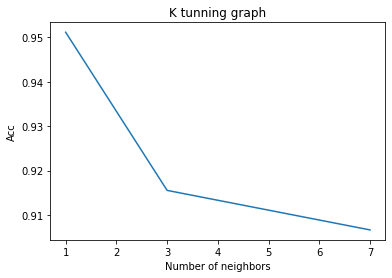

1
Acc for train--> 1.0
Acc for test--> 0.9511111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        25
           1       0.95      1.00      0.97       200

    accuracy                           0.95       225
   macro avg       0.97      0.78      0.85       225
weighted avg       0.95      0.95      0.94       225



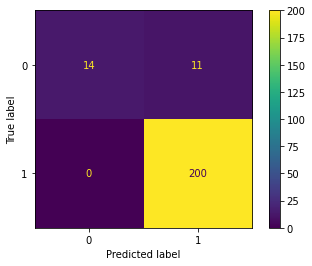

3
Acc for train--> 0.9377777777777778
Acc for test--> 0.9155555555555556
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.91      1.00      0.95       200

    accuracy                           0.92       225
   macro avg       0.96      0.62      0.67       225
weighted avg       0.92      0.92      0.89       225



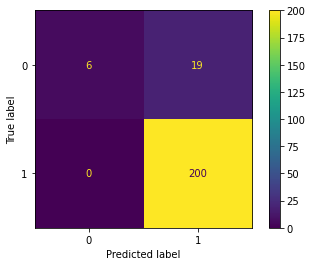

5
Acc for train--> 0.9333333333333333
Acc for test--> 0.9111111111111111
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        25
           1       0.91      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.60      0.64       225
weighted avg       0.92      0.91      0.88       225



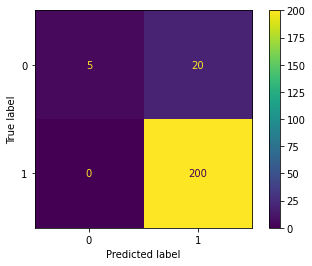

7
Acc for train--> 0.92
Acc for test--> 0.9066666666666666
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        25
           1       0.90      1.00      0.95       200

    accuracy                           0.91       225
   macro avg       0.95      0.58      0.61       225
weighted avg       0.92      0.91      0.88       225



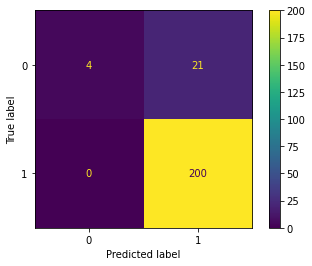

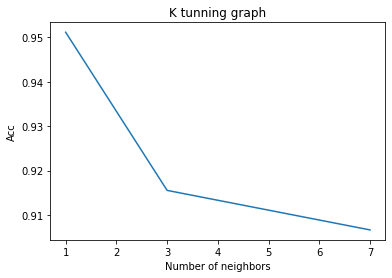

In [ ]:
for i in r2:
    U2 = eigen_vectors2[:,0:i].T
    projected_train_data2 = np.array(np.matmul(centralized_data2, U2.T))
    projected_test_data2 = np.array(np.matmul(X_test2 - np.array(mean2), U2.T))
    acc2 = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        acc2.append(classify(projected_train_data2, y_train2, projected_test_data2, y_test2, k, True))

    plt.plot(k_values, acc2)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title('K tunning graph')
    plt.show()

non faces LDA

In [ ]:
dimensions = 10304

mean_vector2 = dict()
for img_no in range(0, 2):
  img_no = str(img_no)
  img_data = train_data2.loc[img_no]
  mean2 = np.mean(img_data)
  mean_vector2[img_no] = mean2

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# Calculating S and Sb Matrices

total_mean = np.mean(X_train2)
nk = [200, nonfaces_no/2]

S = np.zeros((dimensions,dimensions))
SB = np.zeros((dimensions,dimensions))

for img_no_ in range(0, 2):
  img_no = str(img_no_)
  img_data = train_data2.loc[img_no]
  mean_vector2[img_no]
  Z = np.array(img_data - mean_vector2[img_no])
  S += Z.T.dot(Z)
  diff = np.array(mean_vector2[img_no] - total_mean)
  SB += nk[img_no_]*diff.dot(diff.T)

In [ ]:
A = np.linalg.inv(S).dot(SB)
eigen_values2, eigen_vectors2 = np.linalg.eigh(A)
idx = eigen_values2.argsort()[::-1]   
eig_values2 = eigen_values2[idx]
eig_vectors2 = eigen_vectors2[:,idx]
U2 = eig_vectors2[:, 0:39].T

In [ ]:
projected_train_data3 = np.array(np.matmul(X_train2, U2.T))
projected_test_data3 = np.array(np.matmul(X_test2, U2.T))
acc3 = []
k_values = [1, 3, 5, 7]
for k in k_values:
    acc3.append(classify(projected_train_data3, y_train2, projected_test_data3, y_test2, k,True))

plt.plot(k_values, acc3)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title('K tunning graph')
plt.show()

#8.Bonus (5Points)


1.    **Diffrent traint test split**




In [ ]:
labels=np.array(labels)
labels.shape

(400,)

In [ ]:
def bonus_train_test_split(data, labels):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for i in range(len(data)):
        i_str = str(i)
        i_str = i_str[-1]#last letter of name
        if i_str == '7' or i_str == '8' or i_str == '9':
            X_test.append(data[i])
            y_test.append(labels[i])
           
        else:
            X_train.append(data[i])
            y_train.append(labels[i])
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = bonus_train_test_split(data, labels)
train_data = pd.DataFrame(X_train,index=y_train)

In [ ]:
train_data.shape

(280, 10304)

* using PCA

In [ ]:
def dimensionality(alpha, eig_values):
    sum = np.sum(eig_values)
    r = 0
    i = 0
    for value in eig_values: 
        r = r + eig_values[i]
        i = i + 1
        if (r / sum >= alpha):
            break
    return i

def reduced_dimensions(alpha_values, eig_values):
    reduced_dimensions = []
    for alpha in alpha_values:
        reduced_dimensions.append(dimensionality(alpha, eig_values))
    return reduced_dimensions

def PCA(data, alphas,eigen_vectors,eigen_values):
    r = reduced_dimensions(alphas, eigen_values)
    return r, eigen_vectors

  


In [ ]:
centralized_data = X_train - np.mean(X_train,axis=0, keepdims=True)
print("centralized_data shape:", centralized_data.shape)
cov_matrix=np.cov(np.transpose(centralized_data),bias=True)
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
mean = np.mean(train_data)
print(eigen_values)

centralized_data shape: (280, 10304)
[-2.25859294e-09 -1.28607928e-09 -1.24765717e-09 ...  1.13179252e+06
  2.03423818e+06  2.92654670e+06]


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eigen_values_sum = np.sum(eigen_values)

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
r,eigen_vectors=PCA(data, alphas,eigen_vectors,eigen_values)

In [ ]:
def classify(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    print("Classification report: " )
    print(classification_report(y_test, y_predict))
    #skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20),title=f"Confusion matrix for k= {n_neighbors}");
    return acc

Acc for train--> 1.0
Acc for test--> 0.95
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         3
          24   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


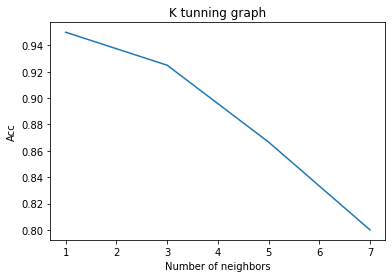

Acc for train--> 1.0
Acc for test--> 0.95
Classification report: 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         3
          24   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


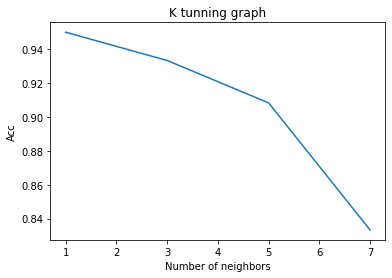

Acc for train--> 1.0
Acc for test--> 0.95
Classification report: 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         3
          24   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


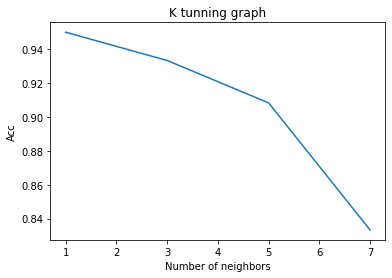

Acc for train--> 1.0
Acc for test--> 0.95
Classification report: 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         3
          24   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


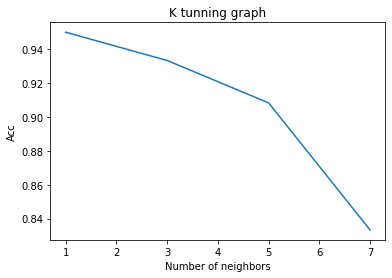

In [ ]:
for i in r:
    U = eigen_vectors[:,0:i].T
    projected_train_data = np.array(np.matmul(centralized_data, U.T))
    projected_test_data = np.array(np.matmul(X_test - np.array(mean), U.T))
    acc = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        acc.append(classify(projected_train_data, y_train, projected_test_data, y_test, k))

    plt.plot(k_values, acc)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title('K tunning graph')
    plt.show()

*  using LDA

In [ ]:
# Calculating Mean Vector

dimensions = 10304
no_of_persons = 40

mean_vector = dict()
for person_no in range(1, no_of_persons + 1):
  person_no = str(person_no)
  person_data = train_data.loc[person_no]
  mean = np.mean(person_data)
  mean_vector[person_no] = mean

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# Calculating S and Sb Matrices

total_mean = np.mean(X_train)
nk = 5

S = np.zeros((dimensions,dimensions))
SB = np.zeros((dimensions,dimensions))

for person_no in range(1, no_of_persons+1):
  person_no = str(person_no)
  person_data = train_data.loc[person_no]
  mean_vector[person_no]
  Z = np.array(person_data - mean_vector[person_no])
  S += Z.T.dot(Z)
  diff = np.array(mean_vector[person_no] - total_mean)
  SB += nk*diff.dot(diff.T)

In [ ]:
A = np.linalg.inv(S).dot(SB)
eigen_values, eigen_vectors = np.linalg.eigh(A)
idx = eigen_values.argsort()[::-1]   
eig_values = eigen_values[idx]
eig_vectors = eigen_vectors[:,idx]
U = eig_vectors[:, 0:39].T

Acc for train--> 1.0
Acc for test--> 0.9166666666666666
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86         3
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
          20       1.00      0.33      0.50         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00         3
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


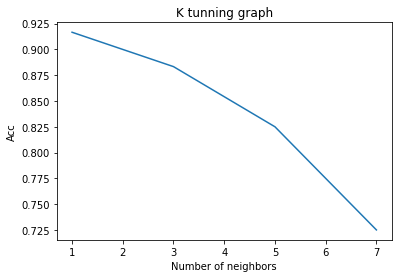

In [ ]:
projected_train_data = np.array(np.matmul(X_train, U.T))
projected_test_data = np.array(np.matmul(X_test, U.T))
acc = []
k_values = [1, 3, 5, 7]
for k in k_values:
    acc.append(classify(projected_train_data, y_train, projected_test_data, y_test, k))

plt.plot(k_values, acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title('K tunning graph')
plt.show()

2. Diffrent variations of PCA and LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA as RandomizedPCA

In [ ]:
(data, labels) = get_images()
X_train, y_train, X_test, y_test = custom_train_test_split(data, labels, len(data))
train_data = pd.DataFrame(X_train,index=y_train)

Reading Started
Reading Finished
number of images 400
length of image  10304
number of faces 400


In [ ]:
train_data.corr()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,1.000000,0.993917,0.994049,0.991621,0.989805,0.988234,0.987932,0.990593,0.988613,0.985969,...,-0.178104,-0.102090,-0.082148,-0.090748,-0.080551,-0.090967,-0.130907,-0.129705,-0.078168,-0.046877
1,0.993917,1.000000,0.994208,0.993928,0.992347,0.990249,0.988537,0.991976,0.990288,0.987817,...,-0.172560,-0.095658,-0.075553,-0.088460,-0.079605,-0.088436,-0.126549,-0.121066,-0.070503,-0.040262
2,0.994049,0.994208,1.000000,0.993781,0.992975,0.990156,0.990260,0.992834,0.989961,0.987165,...,-0.176851,-0.095880,-0.073182,-0.086343,-0.079831,-0.091367,-0.127187,-0.119964,-0.061883,-0.030734
3,0.991621,0.993928,0.993781,1.000000,0.993558,0.993875,0.991080,0.992226,0.990662,0.986693,...,-0.173488,-0.101955,-0.082676,-0.092795,-0.086402,-0.093395,-0.129078,-0.119111,-0.065801,-0.030919
4,0.989805,0.992347,0.992975,0.993558,1.000000,0.994016,0.992320,0.992037,0.988982,0.986209,...,-0.167108,-0.089538,-0.067058,-0.080383,-0.072927,-0.085290,-0.123286,-0.114990,-0.056735,-0.023562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10299,-0.090967,-0.088436,-0.091367,-0.093395,-0.085290,-0.089117,-0.099639,-0.102459,-0.108833,-0.114306,...,0.667187,0.797621,0.830593,0.859008,0.919842,1.000000,0.929693,0.780998,0.714309,0.739523
10300,-0.130907,-0.126549,-0.127187,-0.129078,-0.123286,-0.124665,-0.133847,-0.133286,-0.140945,-0.144499,...,0.636590,0.783629,0.794565,0.817082,0.854039,0.929693,1.000000,0.872810,0.797540,0.814229
10301,-0.129705,-0.121066,-0.119964,-0.119111,-0.114990,-0.111667,-0.121163,-0.119280,-0.130618,-0.137400,...,0.505542,0.681472,0.720166,0.748969,0.780338,0.780998,0.872810,1.000000,0.897711,0.847747
10302,-0.078168,-0.070503,-0.061883,-0.065801,-0.056735,-0.053729,-0.058455,-0.060326,-0.073999,-0.081715,...,0.500382,0.611897,0.651489,0.683402,0.701685,0.714309,0.797540,0.897711,1.000000,0.943634


*  pca

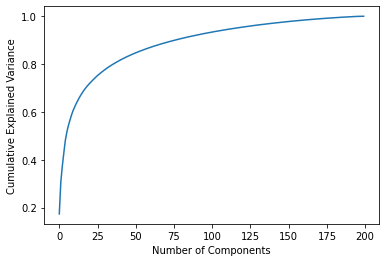

In [ ]:


pca = PCA()
train_pca = pca.fit_transform(X_train)

# Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:


# Perform IPCA on the training faces
ipca = IncrementalPCA(n_components=60)
for batch in np.array_split(X_train, 3):
    ipca.partial_fit(batch)
train_ipca = ipca.transform(X_train)
test_ipca = ipca.transform(X_test)
k_values = [1, 3, 5, 7]
for k in k_values:
# Train a k-NN classifier using the IPCA-reduced features
  knn_ipca = KNeighborsClassifier(n_neighbors=k)
  knn_ipca.fit(train_ipca, y_train)

# Evaluate the performance of the classifier on the testing set

  accuracy_ipca = knn_ipca.score(test_ipca, y_test)

  print('Accuracy with Randomized PCA: %.2f ' % accuracy_ipca ,'k=%.0f'%k)


Accuracy with Randomized PCA: 0.94  k=1
Accuracy with Randomized PCA: 0.86  k=3
Accuracy with Randomized PCA: 0.84  k=5
Accuracy with Randomized PCA: 0.79  k=7


In [ ]:


# Perform Randomized PCA on the training faces
rpca = RandomizedPCA(n_components=50)
train_rpca = rpca.fit_transform(X_train)


k_values = [1, 3, 5, 7]
for k in k_values:
  # Train a k-NN classifier using the Randomized PCA-reduced features
    knn_rpca = KNeighborsClassifier(n_neighbors=k)
    knn_rpca.fit(train_rpca, y_train)

# Evaluate the performance of the classifier on the testing set
    test_rpca = rpca.transform(X_test)
    accuracy_rpca = knn_rpca.score(test_rpca, y_test)

    print('Accuracy with Randomized PCA: %.2f ' % accuracy_rpca ,'k=%.0f'%k)

Accuracy with Randomized PCA: 0.94  k=1
Accuracy with Randomized PCA: 0.87  k=3
Accuracy with Randomized PCA: 0.84  k=5
Accuracy with Randomized PCA: 0.79  k=7


*  lda

In [ ]:


# Apply Fisher's LDA to further reduce the dimensionality of the dataset
n_lda_components = 20
lda = LDA(n_components=n_lda_components, solver='svd')
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train the k-NN classifier
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lda, y_train)

# Test the k-NN classifier
    y_pred = knn.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100),'k=%.0f'%k)  

Accuracy: 95.50% k=1
Accuracy: 93.50% k=3
Accuracy: 91.00% k=5
Accuracy: 91.50% k=7
